# 01/02

## 간단한 분류

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

get_ipython().run_line_magic('matplotlib','inline')

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('230102_company2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,지역,홈페이지
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,부산 부산진구,passorder.co.kr
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,서울 구로구,www.mjplex.co.kr
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,서울 송파구,www.amgine.co.kr
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,서울 강남구,dockingblock.com
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,서울 강남구,https://www.hectoinnovation.co.kr/


- 중소기업 : 3, 중견기업 : 2, 대기업 : 1, 기타 : 4

#### 지역, 홈페이지 column 제거

In [7]:
df_md = df.drop(['지역', '홈페이지'], axis=1)
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3


In [8]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     185 non-null    object 
 1   기업구분    185 non-null    object 
 2   기업구분코드  185 non-null    float64
 3   사원수     185 non-null    int64  
 4   업력      185 non-null    float64
 5   입사율(%)  185 non-null    float64
 6   퇴사율(%)  185 non-null    float64
 7   이직율(%)  181 non-null    float64
 8   별점      185 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.1+ KB


#### 사원수 float 형변환

In [9]:
df_md = df_md.astype({ '사원수' : 'float' })

In [10]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     185 non-null    object 
 1   기업구분    185 non-null    object 
 2   기업구분코드  185 non-null    float64
 3   사원수     185 non-null    float64
 4   업력      185 non-null    float64
 5   입사율(%)  185 non-null    float64
 6   퇴사율(%)  185 non-null    float64
 7   이직율(%)  181 non-null    float64
 8   별점      185 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.1+ KB


### 추천여부 수식

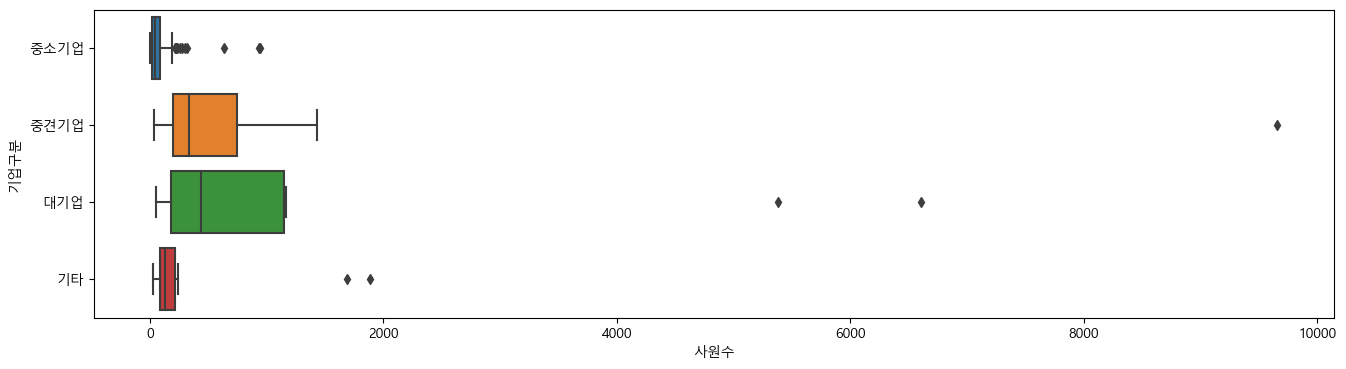

In [30]:
plt.figure(figsize=(16,4))
sns.boxplot(x='사원수', y='기업구분', data=df_md)
plt.show()

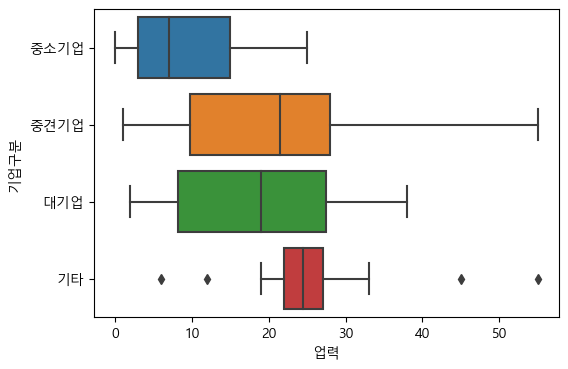

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='업력', y='기업구분', data=df_md)
plt.show()

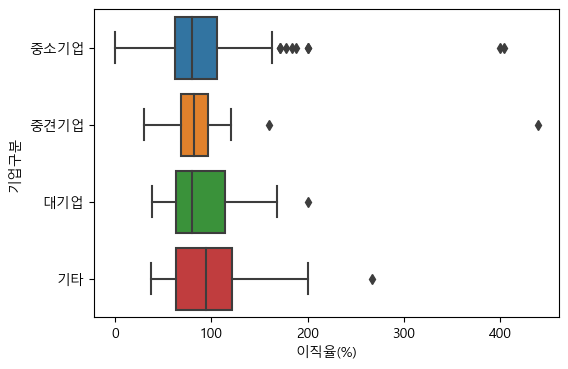

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='이직율(%)', y='기업구분', data=df_md)
plt.show()

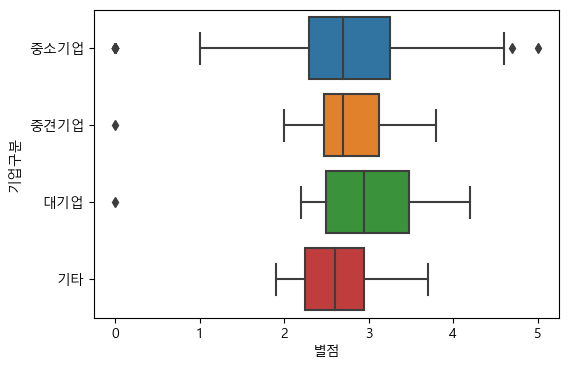

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x='별점', y='기업구분', data=df_md)
plt.show()

#### 1차  가중치 조절

- 기업구분 코드 : 중소1, 중견2, 대3, 기타1
    + '기타'는 기업구분에 따른 사원수와 별점이 중소와 비슷하므로 기타1 점 부여
- 사원수 : 50미만1, 100미만2, 500미만3, 500이상4
- 업력 : 10미만1, 20미만2, 30미만3, 30이상4
- 이직률은 일단 놔두기
- 별점 : 2점이하(1점대)0, 3점미만(2점대)0.5, 4점미만(3점대)2, 5점미만(4점대)3.5, 5점5,
    + 0점 --> 앞선 가중치 기준으로 4이하면 0, 6이하면 2, 8이하면 3, 8초과 4

#### 2차 가중치 조절

- 기업구분 코드 : 중소2, 중견2.5, 대3, 기타2
    + '기타'는 기업구분에 따른 사원수와 별점이 중소와 비슷하므로 기타1 점 부여
- 사원수 : 50미만1, 100미만2, 500미만3, 500이상4
- 업력 : 10미만1, 20미만2, 30미만3, 30이상4
- 이직률은 일단 놔두기
- 별점 : 2점이하(1점대)0, 3점미만(2점대)0.5, 4점미만(3점대)2, 5점미만(4점대)3.5, 5점5,
    + 0점 --> 앞선 가중치 기준으로 4이하면 0, 6이하면 2, 8이하면 3, 8초과 4

In [58]:
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,6.0,1.0
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,7.0,1.0
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,4.0,0.0
3,(주)도킹블록,중소기업,3.0,11.0,3.0,120.00,100.00,83.33,0.0,3.0,0.0
4,(주)헥토이노베이션,중소기업,3.0,140.0,0.0,120.00,100.00,83.33,3.3,5.0,0.0


In [26]:
df_md['가중치'] = np.nan
df_md.head(3)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,NaN
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,NaN
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,NaN


#### 기업구분, 사원수, 업력에 따라서 가중치 부여

In [59]:
for idx, rows in df_md.iterrows():
    weight = 0
    print(df_md.iloc[idx,])
    # 기업구분에 따라서
    if df_md.iloc[idx,1] == '중소기업':
        weight += 2
    elif df_md.iloc[idx,1] == '중견기업':
        weight += 2
    elif df_md.iloc[idx,1] == '대기업':
        weight += 3
    elif df_md.iloc[idx,1] == '기타':
        weight += 2
    
    # 사원수에 따라서    
    if df_md.iloc[idx,3] < 50:
        weight += 1
    elif df_md.iloc[idx,3] < 100:
        weight += 2
    elif df_md.iloc[idx,3] < 500:
        weight += 3
    else:
        weight += 4
        
    # 엽력에 따라서
    if df_md.iloc[idx,4] < 10:
        weight += 1
    elif df_md.iloc[idx,4] < 20:
        weight += 2 
    elif df_md.iloc[idx,4] < 30:
        weight += 3
    else:
        weight += 4
    
    # 별점에 따라서
    if df_md.iloc[idx,-2] <= 4:
        weight += 0
    elif df_md.iloc[idx,-2] <= 6:
        weight += 2 
    elif df_md.iloc[idx,-2] <= 8:
        weight += 3
    else:
        weight += 4
    
    
    # print(weight)
    # print()
    
    df_md.loc[idx, '가중치'] = weight

기업명       (주)페이타랩
기업구분         중소기업
기업구분코드        3.0
사원수          52.0
업력            4.0
입사율(%)     114.71
퇴사율(%)      64.71
이직율(%)      56.41
별점            4.3
가중치           6.0
추천            1.0
Name: 0, dtype: object
기업명       (주)엠제이플렉스
기업구분           중소기업
기업구분코드          3.0
사원수           930.0
업력             17.0
입사율(%)        89.94
퇴사율(%)        97.84
이직율(%)       108.78
별점              2.3
가중치             7.0
추천              1.0
Name: 1, dtype: object
기업명       (주)앰진
기업구분       중소기업
기업구분코드      3.0
사원수        20.0
업력         10.0
입사율(%)     40.0
퇴사율(%)     30.0
이직율(%)     75.0
별점          3.0
가중치         4.0
추천          0.0
Name: 2, dtype: object
기업명       (주)도킹블록
기업구분         중소기업
기업구분코드        3.0
사원수          11.0
업력            3.0
입사율(%)      120.0
퇴사율(%)      100.0
이직율(%)      83.33
별점            0.0
가중치           3.0
추천            0.0
Name: 3, dtype: object
기업명       (주)헥토이노베이션
기업구분            중소기업
기업구분코드           3.0
사원수            140.0
업력               0.0
입사율(%)     

In [60]:
df_md

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,7.0,1.0
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,11.0,1.0
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,5.0,0.0
3,(주)도킹블록,중소기업,3.0,11.0,3.0,120.00,100.00,83.33,0.0,4.0,0.0
4,(주)헥토이노베이션,중소기업,3.0,140.0,0.0,120.00,100.00,83.33,3.3,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
180,(주)유니텍,기타,4.0,36.0,33.0,8.82,23.53,266.78,2.2,9.0,1.0
181,(주)우리기술,기타,4.0,115.0,27.0,8.77,5.26,59.98,2.2,11.0,1.0
182,한국쓰리엠(주),기타,4.0,1686.0,45.0,7.25,8.00,110.34,3.7,14.0,1.0
183,에스지에이(주),기타,4.0,193.0,25.0,80.61,70.92,87.98,2.5,11.0,1.0


In [43]:
df_md['가중치'].unique()

array([ 6.,  7.,  4.,  3.,  5., 10.,  8.,  9., 11.])

#### 가중치 최대, 최소값

In [46]:
max(df_md['가중치']), min(df_md['가중치'])

(11.0, 3.0)

- 최대 11, 최소 3

### 추천여부 설정

- 1차 : 가중치 7 이상이면 추천, 그렇지 않으면 비추천
- 2차 : 가중치 8 이상이면 추천, 그렇지 않으면 비추천
- 3차 : 가중치 9 이상이면 추천, 그렇지 않으면 비추천

In [71]:
df_md['추천'] = np.nan
df_md.head(3)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,7.0,NaN
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,11.0,NaN
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,5.0,NaN


In [72]:
for idx, rows in df_md.iterrows():
    if df_md.iloc[idx,-2] >= 9:
        df_md.iloc[idx,-1] = 1
    else:
        df_md.iloc[idx,-1] = 0


In [68]:
df_md

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,7.0,0.0
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,11.0,1.0
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,5.0,0.0
3,(주)도킹블록,중소기업,3.0,11.0,3.0,120.00,100.00,83.33,0.0,4.0,0.0
4,(주)헥토이노베이션,중소기업,3.0,140.0,0.0,120.00,100.00,83.33,3.3,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
180,(주)유니텍,기타,4.0,36.0,33.0,8.82,23.53,266.78,2.2,9.0,1.0
181,(주)우리기술,기타,4.0,115.0,27.0,8.77,5.26,59.98,2.2,11.0,1.0
182,한국쓰리엠(주),기타,4.0,1686.0,45.0,7.25,8.00,110.34,3.7,14.0,1.0
183,에스지에이(주),기타,4.0,193.0,25.0,80.61,70.92,87.98,2.5,11.0,1.0


In [69]:
df_md.groupby('기업구분')['추천'].count()

기업구분
기타       18
대기업      12
중견기업     24
중소기업    131
Name: 추천, dtype: int64

In [73]:
df_md.groupby('기업구분')['추천'].sum()

기업구분
기타      16.0
대기업     10.0
중견기업    18.0
중소기업    29.0
Name: 추천, dtype: float64

#### 1차
- 중소기업이 거의 살아남지 못했고, 중견과 대기업은 모두 살아남았다.
- ==> 가중치 & 추천여부 조정 필요
#### 2차
- 중소기업이 조금 살아남았고, 중견과 대기업은 모두 살아남았다.
- ==> 가중치 & 추천여부 조정 필요
#### 3차
- 중소기업이 조금 줄어들었고, 중견 6개 탈락, 대기업2개 탈락
- ==> 나중에 다시 가중치 & 추천여부 조정 필요

In [74]:
df_md.groupby('기업구분').sum()

,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
기업구분,,,,,,,,,
기타,72.0,5692.0,465.0,511.86,490.96,1917.68,47.8,184.0,16.0
대기업,12.0,16348.0,231.0,314.83,262.41,1068.66,34.2,146.0,10.0
중견기업,48.0,20394.0,514.0,1083.79,913.72,2342.99,64.0,262.0,18.0
중소기업,393.0,11441.0,1203.0,9528.04,7259.12,11631.79,353.1,831.0,29.0


### 결정트리 돌려보자

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [76]:
df_md.head(3)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,7.0,0.0
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,11.0,1.0
2,(주)앰진,중소기업,3.0,20.0,10.0,40.00,30.00,75.00,3.0,5.0,0.0


In [109]:
df_md2 = df_md.copy()

df_md2.fillna(0, inplace=True)
df_md2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     185 non-null    object 
 1   기업구분    185 non-null    object 
 2   기업구분코드  185 non-null    float64
 3   사원수     185 non-null    float64
 4   업력      185 non-null    float64
 5   입사율(%)  185 non-null    float64
 6   퇴사율(%)  185 non-null    float64
 7   이직율(%)  185 non-null    float64
 8   별점      185 non-null    float64
 9   가중치     185 non-null    float64
 10  추천      185 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.0+ KB


In [110]:
X = df_md2.iloc[:,2:-2]
y = df_md2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [104]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([29,  8], dtype=int64))

- 동일비율 맞춰주기

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13, stratify=y)

In [107]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([22, 15], dtype=int64))

 - 조금 나아졌다

In [112]:
df_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
df_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

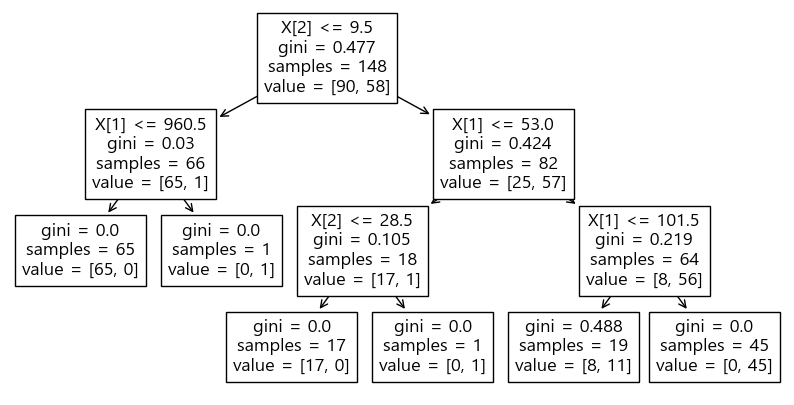

In [114]:
plt.figure(figsize=(10,5))
plot_tree(df_tree);

- X[2] : 업력
- X[1] : 사원수

#### ACC 확인

In [116]:
y_pred_tr = df_tree.predict(X_train)
y_pred = df_tree.predict(X_test)

accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred)

(0.9459459459459459, 0.8648648648648649)

- 의외로 결과 꽤 괜찮은 듯 하다.

### 향후 방향 ==> 가중치 조절 
- 스케일러나 다른 모델도 만들어보기